In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, levy_stable, ks_2samp
sys.path.insert(1, os.sep.join(["..", "packages"]))

from Levy_processes import *
from basicDistributionFunctions import equantile_proces, equantile



In [23]:
Image_width = 10

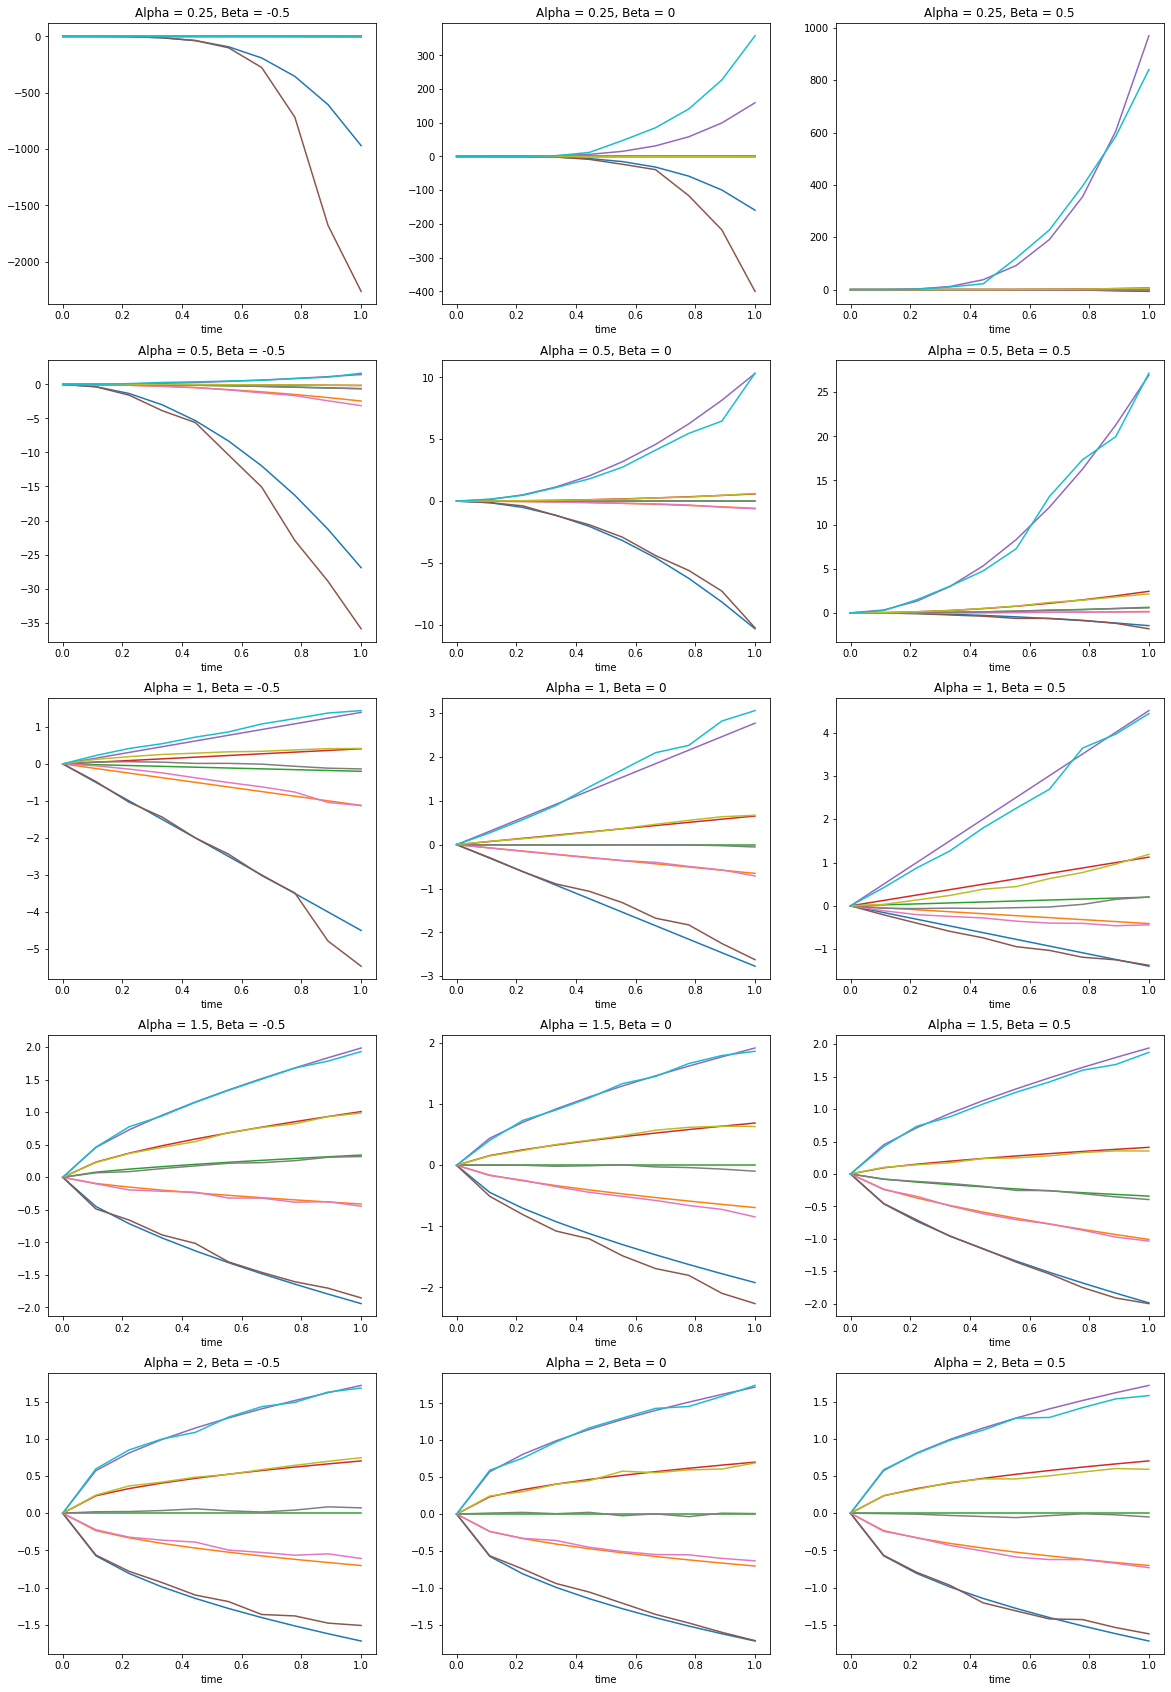

In [29]:
Alphas = [0.25, 0.5, 1, 1.5, 2]
Betas = [-0.5, 0, 0.5]

ps = [0.1, 0.3, 0.5, 0.7, 0.9]
T = 1
M = 10 ** 3
N = 10 ** 1
t = np.linspace(0, 1, N)
t_q = np.linspace(0, 1, M)

# fig, axs = plt.subplots(nrows = len(Alphas), ncols = len(Betas), figsize = (2 * Image_width, 1.5 * Image_width))
fig_q, axs_q = plt.subplots(nrows = len(Alphas), ncols = len(Betas), figsize = (2 * Image_width, 3 * Image_width))

for i, alpha in enumerate(Alphas):
    for j, beta in enumerate(Betas):
        
        Quantile = np.zeros([len(ps), N])
        Quantile_teoretic = np.zeros([len(ps),N])

        # for i in range()
        X = Levy_prcesses(T, M, N, alpha, beta)

        for Np, p in enumerate(ps):
            for k in range(N):
                # print(len(equantile_proces(X.T, p)))
                Quantile[Np,:] = np.squeeze(equantile_proces(X.T, p))

            for k in range(len(ps)):
                Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha, beta)
                # Quantile_teoretic[k,:] = Quantile_teoretic[k,:] * np.sqrt(T * k / M)
        
        for k in range(N):
            Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha))
            # Quantile_teoretic[:,k] = np.squeeze(np.ones([len(ps), 1]) * norm.ppf(k / N))
                
        ax_q = axs_q[i][j];
        ax_q.plot(t, Quantile_teoretic.T);
        ax_q.plot(t, Quantile.T);
        ax_q.set_xlabel("time")
        ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");

        # print(np.sum(X,0))
        # break

